In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [4]:
#reading the csv file and specify datatype for each column

skin = pd.read_csv('sephora_skincare.csv',dtype={
    'brand': 'string',
    'name': 'string',
    'price': 'float64',
    'n_of_reviews': 'int64',
    'n_of_loves': 'int64',
    'review_score': 'float64',
    'size': 'string',
    'clean_product': 'int64',
    'category': 'string'
    })
skin.head()

,Unnamed: 0,brand,name,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category
0,0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69 oz,1,Moisturizers
1,1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1 oz,0,Moisturizers
2,2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08 oz,0,BB & CC Cream
3,3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.7 oz,1,Moisturizers
4,4,SK-II,Facial Treatment Essence,179.0,788,68880,4.0622,None,0,Mists & Essences


In [5]:
skin.dtypes

Unnamed: 0         int64
brand             string
name              string
price            float64
n_of_reviews       int64
n_of_loves         int64
review_score     float64
size              string
clean_product      int64
category          string
dtype: object

In [6]:
#convert columns to uppercase for standardization

skin['brand'] = skin['brand'].str.upper() 
skin['category'] = skin['category'].str.upper()


skin.head()


,Unnamed: 0,brand,name,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category
0,0,DRUNK ELEPHANT,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69 oz,1,MOISTURIZERS
1,1,LA MER,Crreme de la Mer,175.0,493,61648,4.0974,1 oz,0,MOISTURIZERS
2,2,IT COSMETICS,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08 oz,0,BB & CC CREAM
3,3,TATCHA,The Water Cream,68.0,1000,149323,4.2447,1.7 oz,1,MOISTURIZERS
4,4,SK-II,Facial Treatment Essence,179.0,788,68880,4.0622,None,0,MISTS & ESSENCES


In [7]:
#removing some categories that are not skincare, including Minis and Samples, as I'm looking to do an analysis on full size skincare products.

remove = ('MINI SIZE', 'VALUE & GIFT SETS', 'HOLISTIC WELLNESS','NONE',
          'BB & CC CREAM', 'BB & CC CREAMS','FOUNDATION', 'HIGHLIGHTER', 'TINTED MOISTURIZER', 'SETTING SPRAY & POWDER', 'BATH & SHOWER')
skin = skin[~skin['category'].isin(remove)]


# grouping some similar skincare types together and shorten some category names
consolidate = {
   'MOI': 'MOISTURIZER',
   'MOISTURIZER & TREATMENTS': 'MOISTURIZER',
   'MOISTURIZERS':  'MOISTURIZER',
    'NIGHT CREAMS':  'MOISTURIZER',
    'FACE WASH & CLEANSERS' : 'FACE CLEANSERS',
    'BODY LOTIONS & BODY OILS' : 'BODY LOTIONS & OILS',
    'DECOLLETE & NECK CREAMS': 'NECK CREAMS'
}

skin.loc[:, 'category'] = skin['category'].replace(consolidate)

In [31]:
# create product counts and average prices for each category

product_counts = skin.groupby('category')['name'].count()
mid_prices = skin.groupby('category')['price'].median()

category=pd.DataFrame({'Product Count': product_counts, 'Mid Price': ave_prices})
category

,Product Count,Mid Price
category,,
BODY LOTIONS & OILS,2,40.0
FACE CLEANSERS,14,29.5
FACE MASKS,22,46.5
FACE OILS,97,54.0
FACE PRIMER,5,39.0
FACE SERUMS,24,61.0
FACE SUNSCREEN,22,37.0
HAIR OIL,2,29.0
MISTS & ESSENCES,83,35.0


In [24]:
top_brands = skin['brand'].value_counts().nlargest(10)
top_brand_result = pd.DataFrame({'Brand': top_brands.index, 'Number_of_Products': top_brands.values})
top_brand_result

,Brand,Number_of_Products
0,CLINIQUE,40
1,SHISEIDO,34
2,ORIGINS,28
3,LANCÔME,24
4,FRESH,24
5,KIEHL'S SINCE 1851,23
6,ESTÉE LAUDER,21
7,MURAD,18
8,ALGENIST,18
9,CAUDALIE,18


### Data Visualization & Interpretation

C:\Users\Mai Tran\AppData\Local\Temp\ipykernel_9972\491409756.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_counts.index, rotation=80)  #rotating the axis label a little bit for better view


[Text(0, 0, 'BODY LOTIONS & OILS'),
 Text(1, 0, 'FACE CLEANSERS'),
 Text(2, 0, 'FACE MASKS'),
 Text(3, 0, 'FACE OILS'),
 Text(4, 0, 'FACE PRIMER'),
 Text(5, 0, 'FACE SERUMS'),
 Text(6, 0, 'FACE SUNSCREEN'),
 Text(7, 0, 'HAIR OIL'),
 Text(8, 0, 'MISTS & ESSENCES'),
 Text(9, 0, 'MOISTURIZER'),
 Text(10, 0, 'NECK CREAMS'),
 Text(11, 0, 'TONERS')]

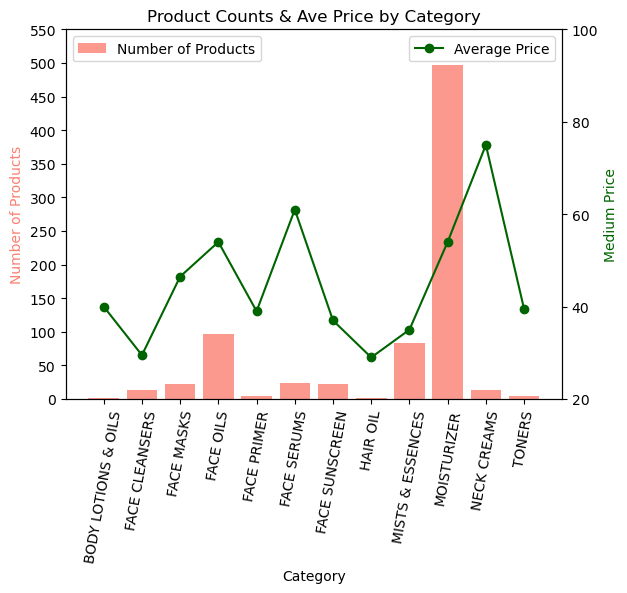

In [32]:
# PLOT 1 - plotting number of products and medium price for each category

fig, ax1 = plt.subplots()
ax1.bar(product_counts.index, product_counts.values, color='salmon', alpha=0.8, label='Number of Products')
ax2 = ax1.twinx()
ax2.plot(mid_prices.index, ave_prices.values, color='darkgreen', marker='o', label='Average Price')

# naming axes and title of the chart
ax1.set_xlabel('Category')
ax1.set_ylabel('Number of Products', color='salmon')
ax2.set_ylabel('Medium Price', color='darkgreen')
plt.title('Product Counts & Ave Price by Category')


ax1.set_yticks(np.arange(0, 600, 50))
ax2.set_yticks(np.arange(20, 120, 20))

# adding the legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.set_xticklabels(product_counts.index, rotation=80)  #rotating the axis label a little bit for better view



The category with the highest number of products is Moisturizer. It is the most common products in any skincare line. A moisturizer is basically a lotion for the face, every body needs one. Each brand has a few moisturizers to accomodate different skin types, or to be used during different time of the day (day/night).

The category with the highest average price per product is Neck creams. Neck creams are products that target the neck and collarbone area. They are not just to moisturize, but to treat specific issues and sign of aging such as wrinkle or sagging skin. Therefore, neck creams usually contain expensive ingredients like retinol, vitamin C, and a variety of peptides. The target customers for this category is who has more disposable income, hence the higher price tag.

#### PLOT 2 - Correlation Coefficient Matrix

Text(0.5, 1.0, 'Correlation Plot: x variables')

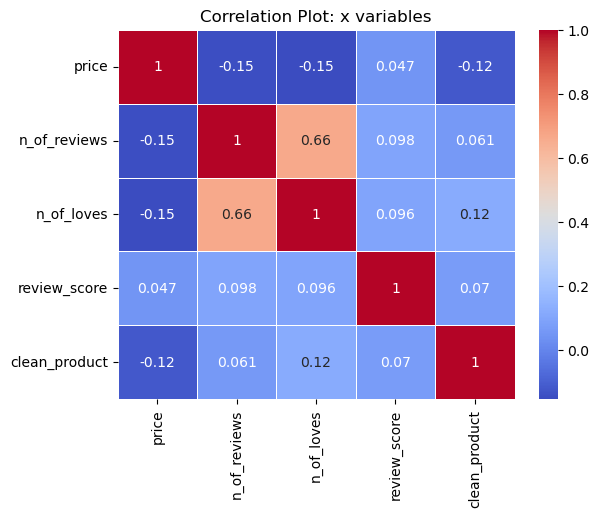

In [19]:
# calculating correlation coefficient matrix

correlation_matrix = skin[['price', 'n_of_reviews', 'n_of_loves', 'review_score','clean_product']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Title
plt.title('Correlation Plot: x variables')

#### PLOT 3 - Scatter plot of Price vs Review Score

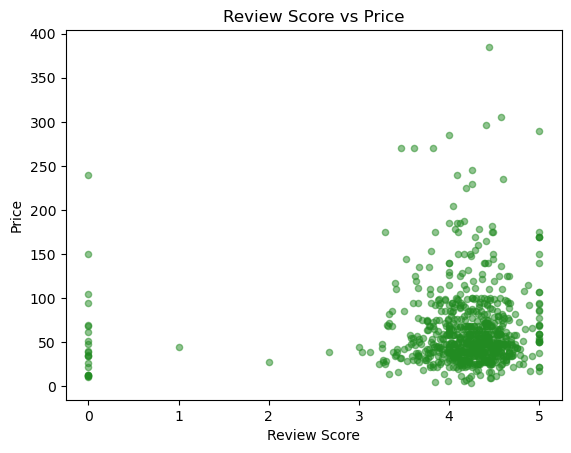

In [13]:
# PLOT 3 - Scatter plot of Price vs Review Score

skin.plot(kind='scatter', x='review_score', y='price', color='forestgreen', alpha=0.5)

# Adding labels and title
plt.xlabel('Review Score')
plt.ylabel('Price')
plt.title('Review Score vs Price')

# Display the plot
plt.show()

The correlation coefficient of price and review_score of 0.047 means very low positive correlation. This shows that the price doesn't really have any impact on the review score, i.e. expensive products can be bad, and affodable products can still be a cult favorite. This is further confirmed by the scatter plot. The plot shows the majority of the data points lie in the 3.5 to 5 on the review score axis, and under $100 on Price. There is no visible pattern or trend between price and review score.